In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [67]:
#Reading the data and studing the dataframe

bike = pd.read_csv('day.csv')

In [68]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [69]:
bike.shape

(730, 16)

In [70]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [71]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [72]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
## dataframe has 730 rows and 16 col.
## there is no null value in any of col.
## instant is just used for indexing so can be dropped
## we can assume dteday can be dropped as we have seperate col. indicating day, holiday, month etc.
## Going through data dictionary - casual / registered user contribute to the total cnt of user and cnt being the predictor, we can safely drop these two col. as well
## atemp looks like a combination of temp, humidity, windspeed (as per data dictionary). as we have all other values and atemp is more of derived col. we can ignore this

In [74]:
#Dropping cols. - 'instant' , 'dteday' , 'casual' ,'registered' , 'atemp'

bike = bike.drop(columns=['instant','dteday','casual','registered','atemp'])
bike.info()
bike.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [75]:
## Categorical Variables = 'season','year','mnth','weekday','workingday','weathersit'
## Numerical Variables = 'temp','hum', 'windspeed'

In [76]:
num_cols=["temp","hum","windspeed","cnt"]
cat_cols=["season","yr","mnth","weekday","workingday","weathersit"]

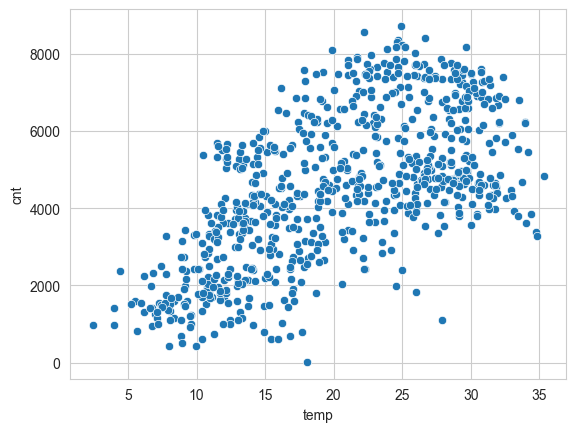

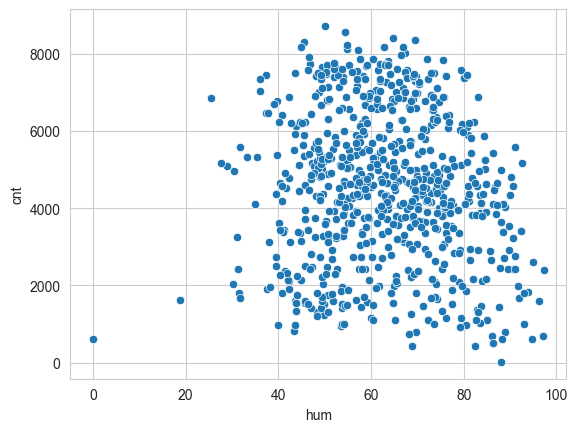

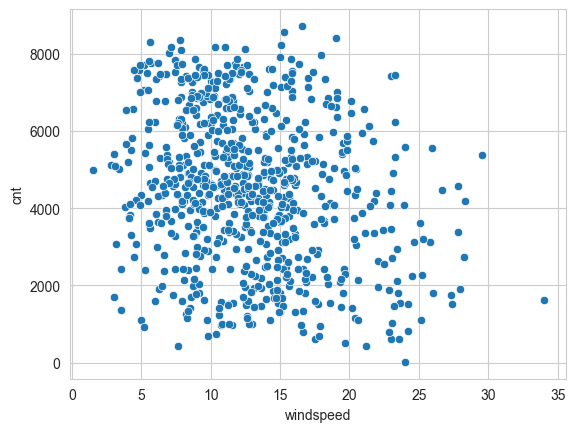

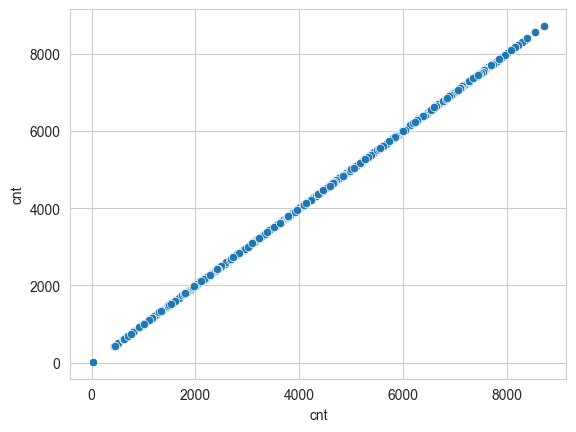

In [77]:
#Univariate Analysis

for i in num_cols:
    sns.set_style("whitegrid")
    sns.scatterplot(data=bike,x=bike[i],y='cnt')
    plt.show()

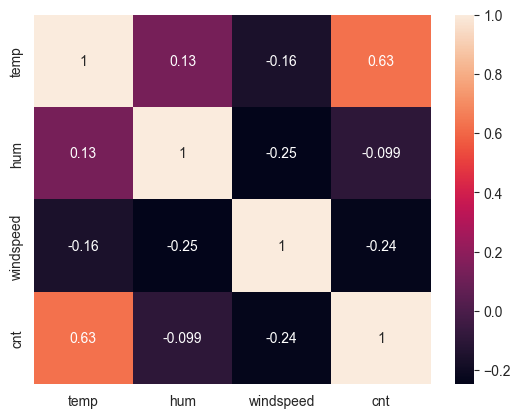

In [78]:
sns.heatmap(bike[num_cols].corr(), annot=True)
plt.show()

In [79]:
## Temp Vs Count - Linear correlation - as the temperature increases the number of bike riders increases. 
##               - Around "30 degress celcius looks optimum for a bike ride.
##               - outliers between 15 and 30

## Humidity Vs Count - Higher the humidity more is the ridership (we like cool wind on our face...). two outliers below 20.

## Windspeed Vs Count - Slightly positive correlation. Windspeed should not be too high, it causes resistance and more effort is required.
##                    - one outlier above 30

## Cnt Vs Humidity, windspeed - almost zero correlation. Shall we choose the feature for our model??

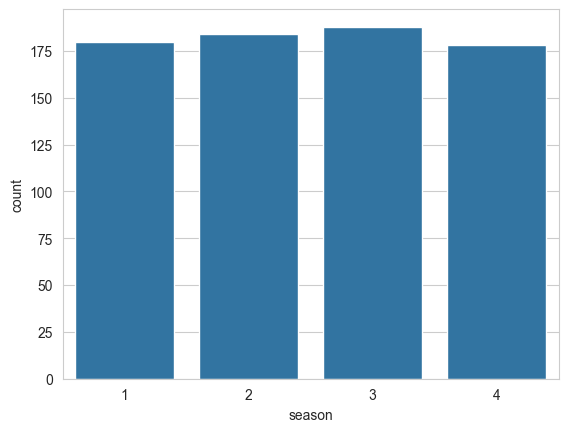

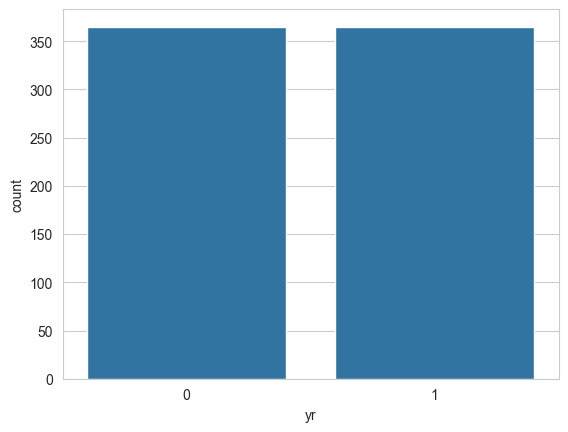

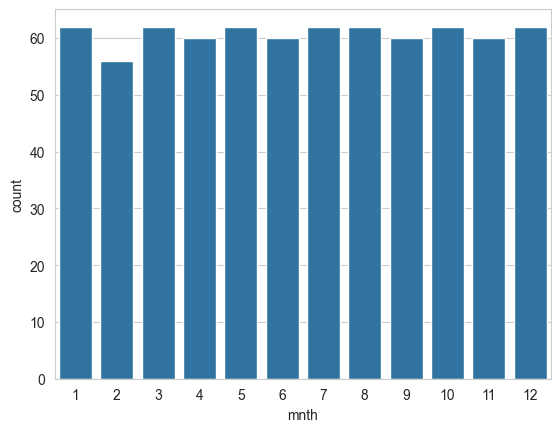

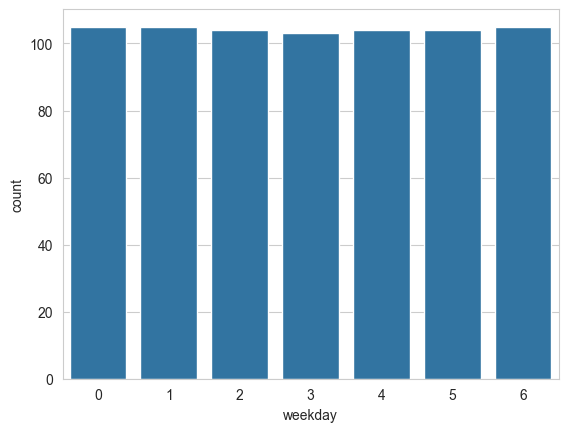

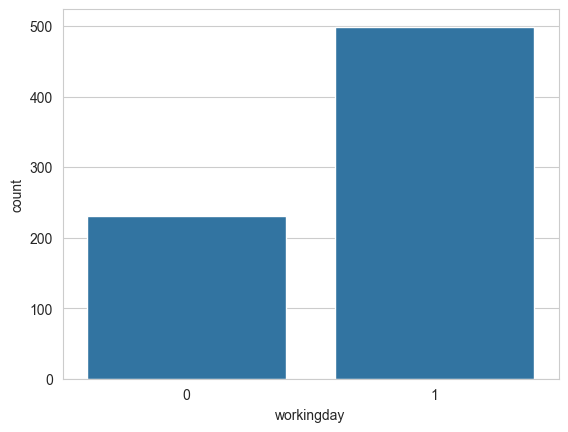

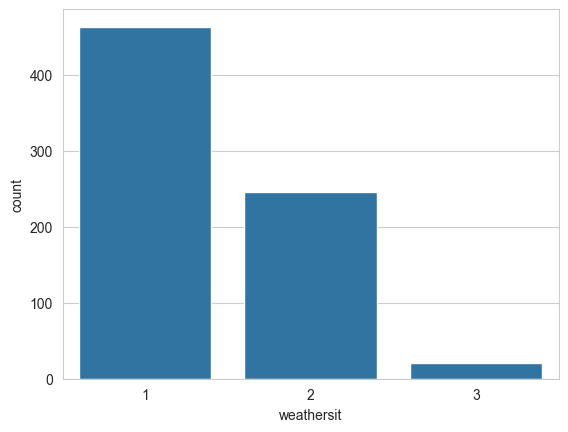

In [80]:
for i in cat_cols:
    sns.set_style("whitegrid")
    sns.countplot(data=bike,x=bike[i])
    plt.show()

In [81]:
for i in cat_cols:
    sorted_unique_values = sorted(bike[i].unique())
    print(sorted_unique_values)


[1, 2, 3, 4]
[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6]
[0, 1]
[1, 2, 3]


In [82]:
bike[cat_cols].nunique()

season         4
yr             2
mnth          12
weekday        7
workingday     2
weathersit     3
dtype: int64

In [83]:
## weathersit : 
##		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## workingday : if day is neither weekend nor holiday is 1, otherwise is 0

## season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [84]:
## Checking the count plot we can observe that:
## 1. Bike rider count is high on a working day as compared to a weekend or on a holiday - (.. non intuitive..)
## 2. Max Rider on Clear, Few clouds, Partly cloudy, Partly cloudy ( with a slightly humid and optimum temp ~30 deg)
## 3. No Rider on Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
## Season, day, month, year doesnot show any difference to the ridership. Should we drop these col. from our model ??

In [85]:
## Doing one-hot encoding for categorical data with more than 2 categories - season, mnth, weekday, weathersit
## one-hot encoding is beneficial to avoid the model interpreting these numbers as ordinal data.

In [86]:
##  Convert numerical month to string to treat it as categorical

bike['season'] = bike['season'].astype(str)
bike['mnth'] = bike['mnth'].astype(str)
bike['weekday'] = bike['weekday'].astype(str)
bike['weathersit'] = bike['weathersit'].astype(str)

In [87]:
# One-hot encoding
bike_encoded = pd.get_dummies(bike, columns = ['season', 'mnth','weekday','weathersit'], drop_first=True,dtype=int)
bike_encoded.shape

(730, 29)

In [88]:
bike_encoded.nunique()

yr                2
holiday           2
workingday        2
temp            498
hum             594
windspeed       649
cnt             695
season_2          2
season_3          2
season_4          2
mnth_10           2
mnth_11           2
mnth_12           2
mnth_2            2
mnth_3            2
mnth_4            2
mnth_5            2
mnth_6            2
mnth_7            2
mnth_8            2
mnth_9            2
weekday_1         2
weekday_2         2
weekday_3         2
weekday_4         2
weekday_5         2
weekday_6         2
weathersit_2      2
weathersit_3      2
dtype: int64

In [89]:
## Train - Test Split

In [90]:
X=bike_encoded.drop(["cnt"],axis=1)
y=bike_encoded["cnt"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
##Scaling

In [93]:
X_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_10,...,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
247,0,1,0,27.606653,79.0417,14.250632,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
335,0,0,1,12.880847,62.5833,6.750518,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
702,1,0,1,19.509153,73.3750,11.666643,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [95]:
X_train_bike=pd.DataFrame(X_train,columns=X.columns)
X_test_bike=pd.DataFrame(X_test,columns=X.columns)

In [96]:
X_train_bike.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_10,...,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,-1.024267,5.45315,-1.434431,0.941813,1.094484,0.352149,-0.57735,1.663653,-0.585260,-0.325669,...,-0.288943,3.268027,2.406387,-0.40129,-0.40129,-0.415561,-0.392620,-0.409878,1.380389,-0.18338
1,-1.024267,-0.18338,0.697141,-1.029248,-0.063061,-1.144131,-0.57735,-0.601087,1.708644,-0.325669,...,-0.288943,-0.305995,-0.415561,-0.40129,-0.40129,-0.415561,2.546994,-0.409878,-0.724434,-0.18338


In [97]:
## Feature Selection

In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [99]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

In [100]:
selector=selector.fit(X_train_bike,y_train)
selector.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True])

In [101]:
selected_features=X_train_bike.columns[selector.support_]
print(selected_features)

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_11', 'mnth_12', 'mnth_7', 'mnth_9', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [102]:
X_train=X_train_bike[selected_features]
X_test=X_test_bike[selected_features]

In [103]:
##Modeling

In [104]:
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [105]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          4.92e-213
Time:                        15:25:12   Log-Likelihood:                -4722.3
No. Observations:                 584   AIC:                             9477.
Df Residuals:                     568   BIC:                             9546.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4546.3613     32.986    137.828      0.000    4481.572    4611.150
yr             987.1052     33.590     29.387      0.000     921.130    1053.080
workingday     195.4480     41.235      4.740      0.000     114.457     276.439
temp           882.8636     67.073     13.163      0.000     751.123    1014.604
hum           -204.5543     45.840     -4.462      0.000    -294.591    -114.517
windspeed     -226.5086     35.923     -6.305      0.000    -297.067    -155.950
season_2       526.0611     56.881      9.248      0.000     414.339     637.783
season_3       400.2041     80.445      4.975      0.000     242.198     558.211
season_4       805.8326     57.512     14.012      0.000     692.870     918.795
mnth_11       -182.2181     43.304     -4.208      0.000    -267.273     -97.163
mnth_12       -131.6496     37.981     -3.466      0.001    -206.250     -57.050
mnth_7        -105.0588     42.427     -2.476      0.014    -188.391     -21.726
mnth_9         159.7928     38.772      4.121      0.000      83.638     235.947
weekday_6      180.6426     40.959      4.410      0.000     100.193     261.092
weathersit_2  -208.1605     41.616     -5.002      0.000    -289.900    -126.421
weathersit_3  -366.6079     38.040     -9.637      0.000    -441.325    -291.891
==============================================================================
Omnibus:                       83.237   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.323
Skew:                          -0.720   Prob(JB):                     1.44e-48
Kurtosis:                       5.642   Cond. No.                         5.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.036946
2,workingday,1.562686
3,temp,4.134665
4,hum,1.931259
5,windspeed,1.186031
6,season_2,2.973570
7,season_3,5.947697
8,season_4,3.039951
9,mnth_11,1.723467


In [107]:
## Lets drop season_3: VIF is 5.947697. This indicates that the variable season_3 (likely representing the third season - Fall) has high multicollinearity with the other predictors in the model. 

In [108]:
X_train_sm=X_train_sm.drop(["season_3"],axis=1)
X_test_sm=X_test_sm.drop(["season_3"],axis=1)

In [109]:
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     199.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          5.89e-209
Time:                        15:25:12   Log-Likelihood:                -4734.7
No. Observations:                 584   AIC:                             9499.
Df Residuals:                     569   BIC:                             9565.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4546.3613     33.667    135.039      0.000    4480.234    4612.488
yr             976.9651     34.220     28.549      0.000     909.752    1044.178
workingday     198.3738     42.082      4.714      0.000     115.719     281.029
temp          1134.9464     44.853     25.304      0.000    1046.849    1223.044
hum           -220.1526     46.677     -4.716      0.000    -311.834    -128.471
windspeed     -226.4235     36.665     -6.175      0.000    -298.439    -154.408
season_2       322.4162     40.310      7.999      0.000     243.242     401.590
season_4       629.0760     46.159     13.629      0.000     538.414     719.738
mnth_11       -130.4930     42.906     -3.041      0.002    -214.766     -46.220
mnth_12       -105.0329     38.379     -2.737      0.006    -180.414     -29.651
mnth_7         -60.1600     42.312     -1.422      0.156    -143.267      22.947
mnth_9         220.8383     37.539      5.883      0.000     147.107     294.570
weekday_6      188.4592     41.774      4.511      0.000     106.409     270.509
weathersit_2  -199.8560     42.441     -4.709      0.000    -283.216    -116.496
weathersit_3  -354.7434     38.750     -9.155      0.000    -430.854    -278.633
==============================================================================
Omnibus:                       67.918   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.389
Skew:                          -0.680   Prob(JB):                     2.42e-30
Kurtosis:                       4.938   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# mnth_7 have high p-value(>.05) Lets drop it

In [111]:
X_train_sm=X_train_sm.drop("mnth_7",axis=1)
X_test_sm=X_test_sm.drop("mnth_7",axis=1)

In [113]:
model3=sm.OLS(np.array(y_train),X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.08e-209
Time:                        15:28:04   Log-Likelihood:                -4735.8
No. Observations:                 584   AIC:                             9500.
Df Residuals:                     570   BIC:                             9561.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4546.3613     33.697    134.918      0.000    4480.175    4612.547
yr             978.2739     34.238     28.572      0.000     911.025    1045.523
workingday     201.1698     42.074      4.781      0.000     118.531     283.808
temp          1102.9374     38.828     28.405      0.000    1026.673    1179.202
hum           -213.6207     46.492     -4.595      0.000    -304.938    -122.303
windspeed     -223.8142     36.652     -6.106      0.000    -295.804    -151.825
season_2       344.1223     37.340      9.216      0.000     270.781     417.463
season_4       642.2736     45.256     14.192      0.000     553.384     731.163
mnth_11       -133.3281     42.898     -3.108      0.002    -217.585     -49.072
mnth_12       -107.2165     38.382     -2.793      0.005    -182.605     -31.828
mnth_9         236.0595     36.012      6.555      0.000     165.327     306.793
weekday_6      189.9332     41.799      4.544      0.000     107.835     272.031
weathersit_2  -201.4066     42.465     -4.743      0.000    -284.814    -117.999
weathersit_3  -358.3965     38.699     -9.261      0.000    -434.407    -282.386
==============================================================================
Omnibus:                       71.533   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.577
Skew:                          -0.710   Prob(JB):                     4.03e-32
Kurtosis:                       4.981   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.032380
2,workingday,1.558956
3,temp,1.327739
4,hum,1.903605
5,windspeed,1.183059
6,season_2,1.227906
7,season_4,1.803727
8,mnth_11,1.620605
9,mnth_12,1.297409


In [118]:
#Testing the model

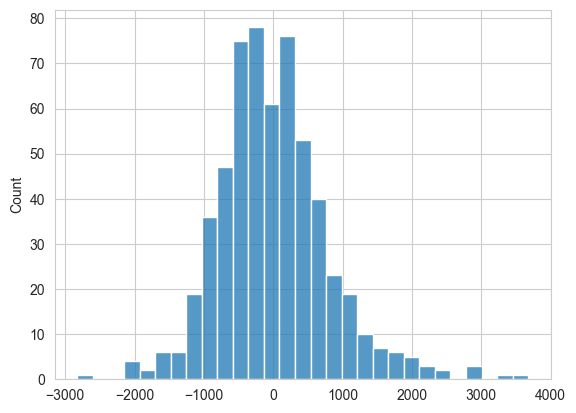

In [122]:

sns.histplot(res3.predict(X_train_sm)-y_train.reset_index(drop=True))
plt.show()

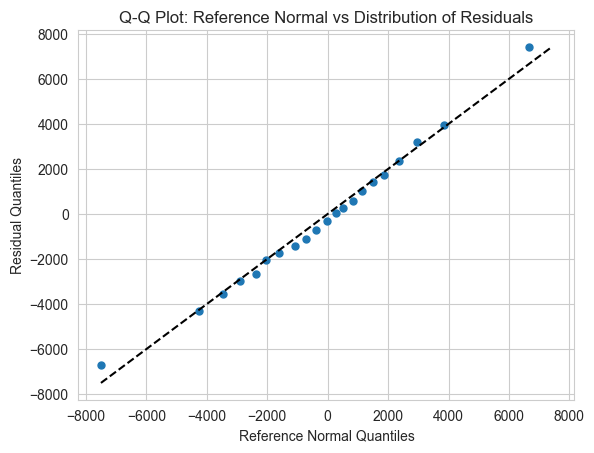

In [153]:
# Predict on training data
y_train_pred = res3.predict(X_train_sm)
y_train_pred_df = pd.DataFrame(y_train_pred, index=y_train.index, columns=['cnt_pred'])

# Calculate residuals
residuals = y_train - y_train_pred_df['cnt_pred']

# Identify NaN indices and drop them (as QQ plot was not showing values due to presence of NaN values)
nan_indices = residuals[residuals.isna()].index
residuals = residuals.dropna()

# Plotting QQ plot of the residues
mean = residuals.mean()
std = residuals.std()
ref_normal = np.random.normal(mean, std, residuals.shape[0])

# Calculate percentiles
percs = np.linspace(0, 100, 21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(residuals, percs)

plt.plot(qn_ref_normal, qn_residual, ls="", marker="o", markersize=5)
x_min = min(qn_ref_normal.min(), qn_residual.min())
x_max = max(qn_ref_normal.max(), qn_residual.max())
plt.plot([x_min, x_max], [x_min, x_max], color="k", ls="--")

plt.title('Q-Q Plot: Reference Normal vs Distribution of Residuals')
plt.xlabel('Reference Normal Quantiles')
plt.ylabel('Residual Quantiles')
plt.show()


In [142]:
# the plotted residues are approximately normal which means there is normality in regression analysis.

In [147]:
## Adjusted R2 = 0.827

In [2]:
### The most favourable seasons for biking are summer and winter.
## Year - 2 years data is available and the increase in the bikes has increased from 2018 to 2019.
## Weekday - bike usage is preferred on Saturdays 
## Weathersit - weather condition is the clean/few clouds days is good for biking. even on the light rainy days, ebikes are being used for daily commute.
## Month - favourable months are November, December